## Imports

In [ ]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
from google.colab.patches import cv2_imshow
import numpy as np

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## Files

In [ ]:
retinal_img = "/content/drive/MyDrive/Assignment 1/eye-stroke.jpeg"
varicose_img = "/content/drive/MyDrive/Assignment 1/varicose.png"
varicose_counter_img = '/content/drive/MyDrive/Assignment 1/varicose_1.jpeg'
rose = '/content/drive/MyDrive/Assignment 1/Image Histogram.jpg'

## Image Enhancement Class

In [ ]:
class ImageEnhancement:
    '''
    A class that is used to generalise the whole
    proces of Image Enhancement using CLAHE and HE
    '''
    def __init__(self,img):
        '''
        path: path to the file
        img: image vector 
        '''
        self.path = img
        self.img = cv2.imread(img)
        self.rgb, self.b, self.g, self.r = self.extract_rgb()
    
    def extract_rgb(self):

        b, g, r = cv2.split(self.img)
        rgb = np.dstack([b, g, r])

        #Displayed the image
        return  rgb, b, g, r

    def image_histogram(self, img=None, plt_title="Image Histogram"):
        '''A function that creates a histogram
        given a image vector
        '''
        # hist,bins = np.histogram()
        if img is None:
            img = self.img
        _ = plt.hist(img.ravel(),256,[0,256])  
        plt.title(plt_title)
        plt.show()
        return 

    def enh_using_clahe(self, B_cl=0, G_cl=0, R_cl=0, show_img=True):
        '''
        A function used to enhance an image using 
        CLAHE
        B_cl : ClipLimit of B channel
        G_cl : ClipLimit of G channel
        R_cl : ClipLimit of R channel       

        '''
        b,g,r = self.b, self.g, self.r
        if B_cl > 0:
            clahe_b = cv2.createCLAHE(B_cl)
            b_enhanced = clahe_b.apply(b)
        else: b_enhanced = b    
        if R_cl > 0:
            clahe_r = cv2.createCLAHE(R_cl)  
            r_enhanced = clahe_r.apply(r)
        else: r_enhanced = r
        if G_cl > 0:
            clahe_g = cv2.createCLAHE(G_cl)
            g_enhanced = clahe_g.apply(g)
        else: g_enhanced = g

        new_rgb = np.dstack([b_enhanced, g_enhanced, r_enhanced])
        if show_img: cv2_imshow(new_rgb)
        return new_rgb

    def enh_using_equ(self):
        '''
        A function to implement Histogram
        Equalization
        '''
        return cv2.equalizeHist(cv2.imread(self.path,0))

## Sample Execution

In [ ]:
retinalImage = ImageEnhancement(retinal_img)
rgb = retinalImage.extract_rgb()

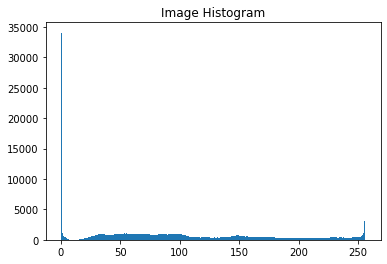

In [ ]:
# Image Histogram of Retina Image
retinalImage.image_histogram()

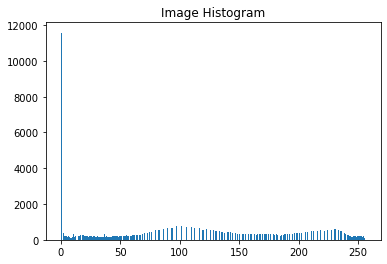

In [ ]:
# Image Histogram post Histogram Equalization
equ = retinalImage.enh_using_equ()
retinalImage.image_histogram(equ)

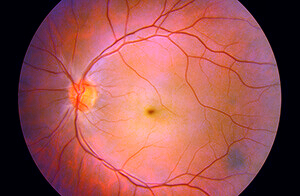

In [ ]:
# Applying CLAHE to B channel of the image
clahe_rgb = retinalImage.enh_using_clahe(B_cl=5)

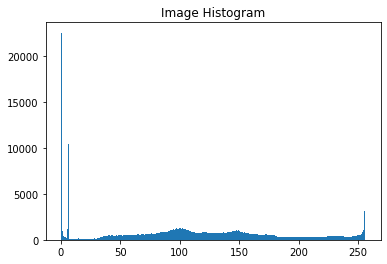

In [ ]:
# Histogram after applying CLAHE on B Channel
retinalImage.image_histogram(clahe_rgb)

## Image Histogram w/ Equalization & CLAHE

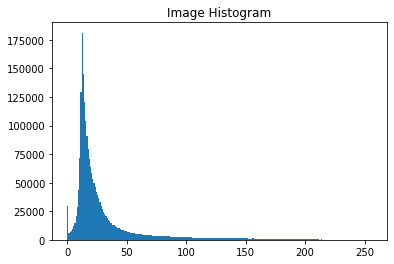

In [ ]:
rose_img = ImageEnhancement(rose)
rose_img.image_histogram()

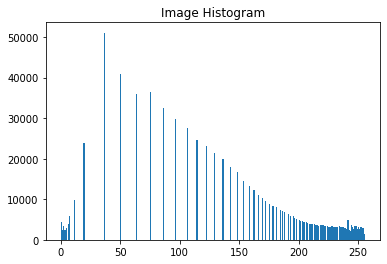

In [ ]:
rose_equ_rgb = rose_img.enh_using_equ()
rose_img.image_histogram(rose_equ_rgb)

In [ ]:
rose_clahe_rgb = rose_img.enh_using_clahe(B_cl=5, show_img=False)

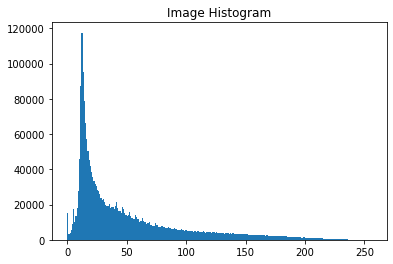

In [ ]:
rose_img.image_histogram(rose_clahe_rgb)

# Experimentation Section

### Re-used Function:

In [ ]:

def enhance(img,B_cl=0, G_cl=0, R_cl=0):
    '''
    Same as enh_using_clahe function in 
    ImageEnhancement Class
    '''
    if B_cl > 0:
        clahe_b = cv2.createCLAHE(B_cl)
        b_enhanced = clahe_b.apply(b)
    else: b_enhanced = b    
    if R_cl > 0:
        clahe_r = cv2.createCLAHE(R_cl)  
        r_enhanced = clahe_r.apply(r)
    else: r_enhanced = r
    if G_cl > 0:
        clahe_g = cv2.createCLAHE(G_cl)
        g_enhanced = clahe_g.apply(g)
    else: g_enhanced = g

    new_rgb = np.dstack([b_enhanced, g_enhanced, r_enhanced])
    cv2_imshow(new_rgb)

## Retinal Image Enhancements - Experimentation

In [ ]:
img = cv2.imread(retinal_img)
b, g, r = cv2.split(img)
rgb = np.dstack([b, g, r])

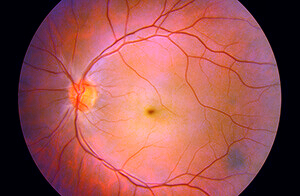

In [ ]:
'''
R channel:None
G channel:None
B channel:5
'''
enhance(rgb,B_cl=5)

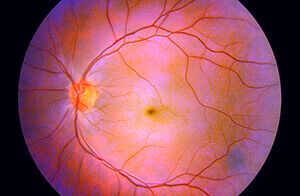

In [ ]:
'''
R channel:None
G channel:None
B channel:10
'''
enhance(img,B_cl=10)

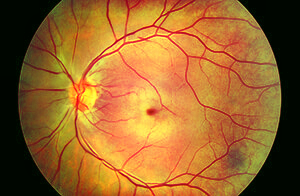

In [ ]:
'''
R channel:None
G channel:5
B channel:None
'''
enhance(img,G_cl=5)

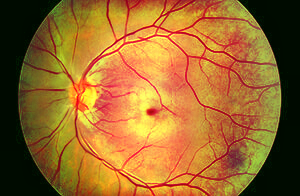

In [ ]:
'''
R channel:None
G channel:10
B channel:None
'''
enhance(img,G_cl=10)

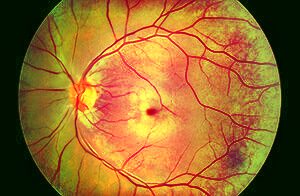

In [ ]:
'''
R channel:None
G channel:15
B channel:None
'''
enhance(img,G_cl=15)

## Varicose Vein Image - 1 Enhancements - Experimentation

In [ ]:
img = cv2.imread(varicose_img)
b, g, r = cv2.split(img)
rgb = np.dstack([b, g, r])

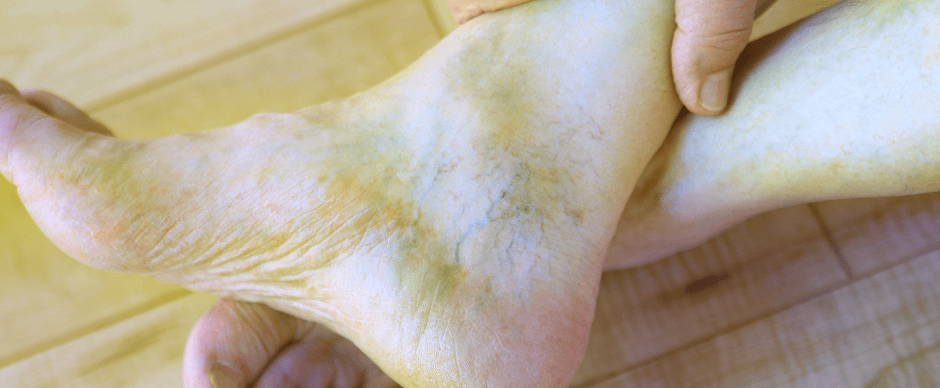

In [ ]:
'''
R channel:None
G channel:None
B channel:5
'''
enhance(img,B_cl=5)

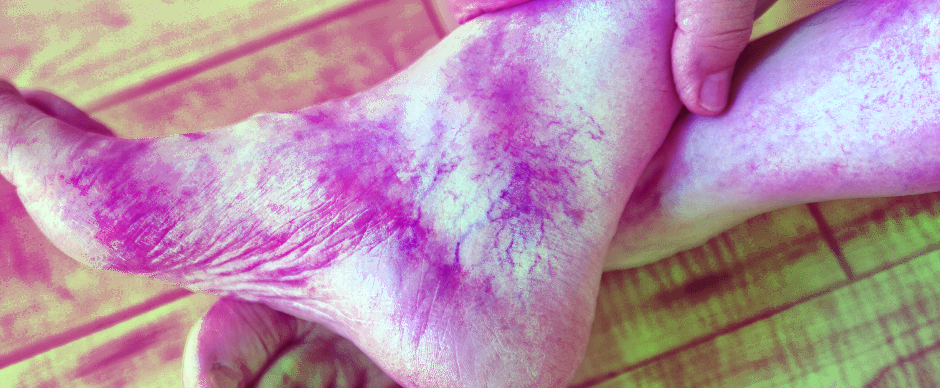

In [ ]:
'''
R channel:None
G channel:15
B channel:None
'''
enhance(img,G_cl=15)

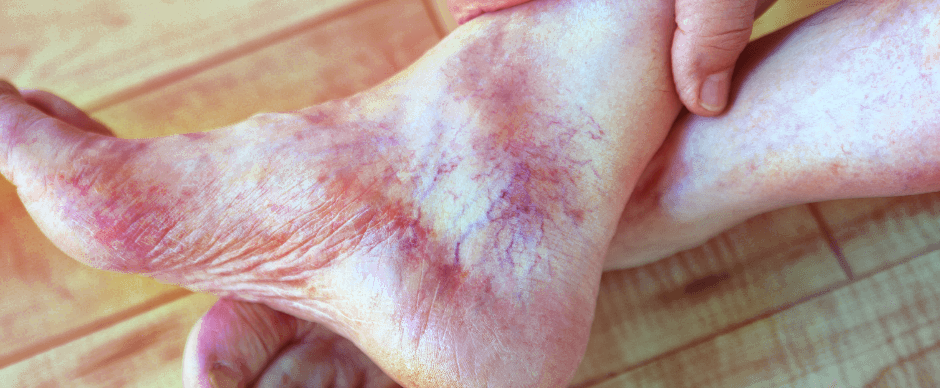

In [ ]:
'''
R channel:None
G channel:5
B channel:15
'''
enhance(img,G_cl=5, B_cl=5)

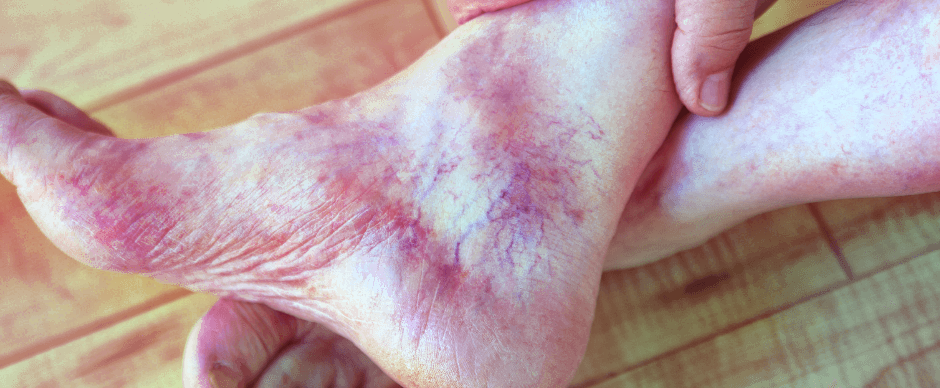

In [ ]:
'''
R channel:None
G channel:5
B channel:3
'''
enhance(img,G_cl=5, B_cl=3)

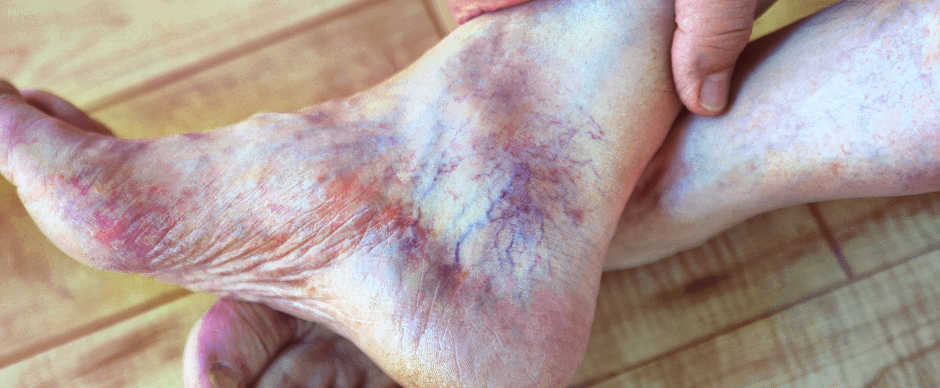

In [ ]:
'''
R channel:2
G channel:5
B channel:5
'''
enhance(img,G_cl=5, B_cl=5, R_cl=2)

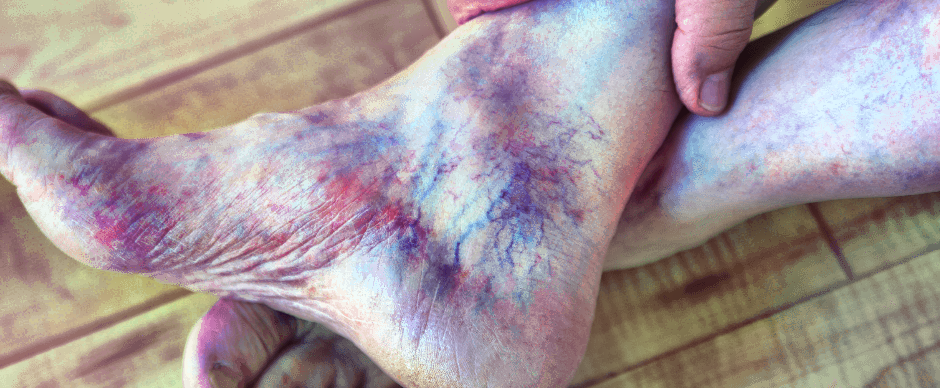

In [ ]:
'''
R channel:5
G channel:8
B channel:4
'''
enhance(img,G_cl=8, B_cl=4, R_cl=5)

## Varicose Vein Image - 2 Enhancements - Experimentation

In [ ]:
img = cv2.imread(varicose_counter_img)
b, g, r = cv2.split(img)
rgb = np.dstack([b, g, r])

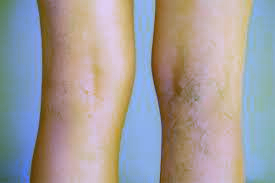

In [ ]:
'''
R channel:None
G channel:None
B channel:5
'''
enhance(img,B_cl=5)

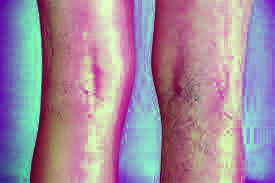

In [ ]:
'''
R channel:None
G channel:15
B channel:None
'''
enhance(img,G_cl=15)

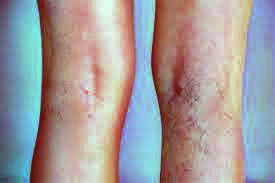

In [ ]:
'''
R channel:None
G channel:5
B channel:5
'''
enhance(img,G_cl=5, B_cl=5)

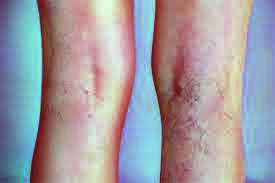

In [ ]:
'''
R channel:None
G channel:5
B channel:3
'''
enhance(img,G_cl=5, B_cl=3)

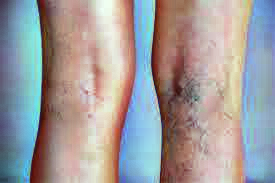

In [ ]:
'''
R channel:2
G channel:5
B channel:5
'''
enhance(img,G_cl=5, B_cl=5, R_cl=2)

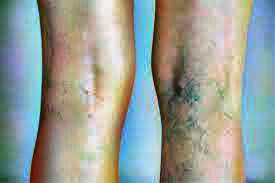

In [ ]:
'''
R channel:5
G channel:8
B channel:4
'''
enhance(img,G_cl=4, B_cl=8, R_cl=5)